In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/Players2024.csv')

df.head()

,name,birth_date,height_cm,positions,nationality,Age,Club
0,James Milner,1986-01-04,175.0,Midfield,England,38,Brighton and Hove Albion Football Club
1,Anastasios Tsokanis,1991-05-02,176.0,Midfield,Greece,33,Volou Neos Podosferikos Syllogos
2,Jonas Hofmann,1992-07-14,176.0,Midfield,Germany,32,Bayer 04 Leverkusen Fußball
3,Pepe Reina,1982-08-31,188.0,Goalkeeper,Spain,42,Calcio Como
4,Lionel Carole,1991-04-12,180.0,Defender,France,33,Kayserispor Kulübü


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5935 entries, 0 to 5934
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         5935 non-null   object 
 1   birth_date   5935 non-null   object 
 2   height_cm    5935 non-null   float64
 3   positions    5935 non-null   object 
 4   nationality  5935 non-null   object 
 5   Age          5935 non-null   int64  
 6   Club         5935 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 324.7+ KB


1. What is the average age of players in the dataset?

In [ ]:
df['Age'].mean().round(2)

25.5

2. How does the average height of players vary by nationality?

In [ ]:
df.groupby('nationality')['height_cm'].mean().round(2)

,height_cm
nationality,
Albania,184.43
Algeria,179.89
Andorra,190.00
Angola,182.73
Argentina,179.72
...,...
Uzbekistan,181.22
Venezuela,183.83
Wales,182.12


3. What is the distribution of players' heights in centimeters?

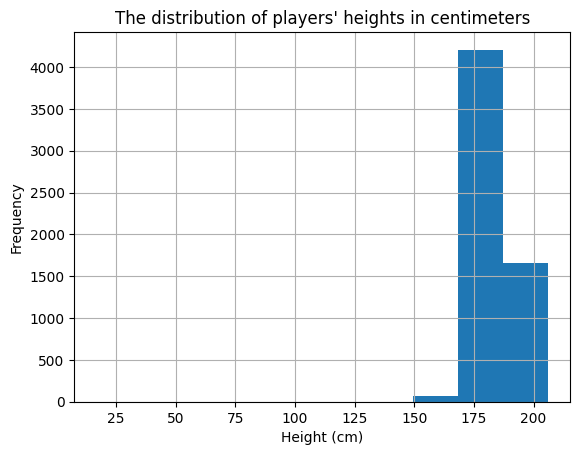

In [ ]:
plt.hist(df['height_cm'], bins = 10)

plt.title("The distribution of players' heights in centimeters")

plt.xlabel('Height (cm)')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()

4. Are there any correlations between a player’s age and their height?

In [ ]:
df['Age'].corr(df['height_cm']).round(2)

0.02

5. What is the average height of players by playing position?

In [ ]:
df.groupby('positions')['height_cm'].mean().round(2)

,height_cm
positions,
Attack,180.80
Defender,184.11
Goalkeeper,190.67
Midfield,180.40
Missing,187.00


6. How many players belong to each nationality?

In [ ]:
df.groupby('nationality').size().reset_index(name = 'Frequency')

,nationality,Frequency
0,Albania,30
1,Algeria,35
2,Andorra,1
3,Angola,15
4,Argentina,124
...,...,...
130,Uzbekistan,9
131,Venezuela,18
132,Wales,24
133,Zambia,4


7. What is the average age of players by nationality?

In [ ]:
df.groupby('nationality')['Age'].mean().round(2)

,Age
nationality,
Albania,24.83
Algeria,25.49
Andorra,23.00
Angola,27.27
Argentina,26.27
...,...
Uzbekistan,24.22
Venezuela,25.17
Wales,26.58


8. How many players are above 30 years old?

In [ ]:
df[df['Age'] > 30].shape[0]

884

9. What is the youngest player's age and which club do they play for?

In [ ]:
df.groupby(['Club', 'name'])['Age'].min().sort_values(ascending = True).head(1)

,,Age
Club,name,
Kasımpaşa Spor Kulübü,Şant Kazancı,15


10. What is the oldest player's age and their club?

In [ ]:
df.groupby(['name', 'Club'])['Age'].min().sort_values(ascending = False).head(1)

,,Age
name,Club,
Pepe Reina,Calcio Como,42


11. How many players are in each position category (e.g., Midfield, Goalkeeper, Defender)?

In [ ]:
df.groupby('positions').size().reset_index(name = 'Frequency')

,positions,Frequency
0,Attack,1571
1,Defender,1962
2,Goalkeeper,724
3,Midfield,1677
4,Missing,1


12. What is the average age of players by position?

In [ ]:
df.groupby('positions')['Age'].mean().round(2)

,Age
positions,
Attack,25.06
Defender,25.72
Goalkeeper,26.59
Midfield,25.20
Missing,18.00


13. Which club has the youngest team on average?

In [ ]:
df.groupby('Club')['Age'].mean().nsmallest(1)

,Age
Club,
Racing Club de Strasbourg Alsace,21.5


14. Which club has the oldest team on average?

In [ ]:
df.groupby('Club')['Age'].mean().nlargest(1)

,Age
Club,
Rayo Vallecano de Madrid S.A.D.,29.0


15. What is the height distribution for midfielders?

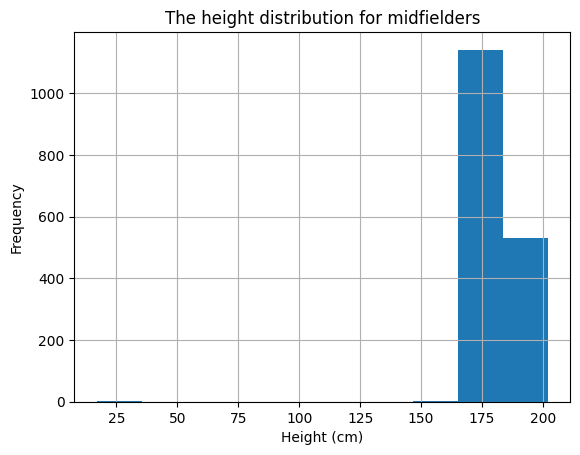

In [ ]:
plt.hist(df[df['positions'] == 'Midfield']['height_cm'])

plt.title('The height distribution for midfielders')

plt.xlabel('Height (cm)')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()

16. What is the height distribution for goalkeepers?

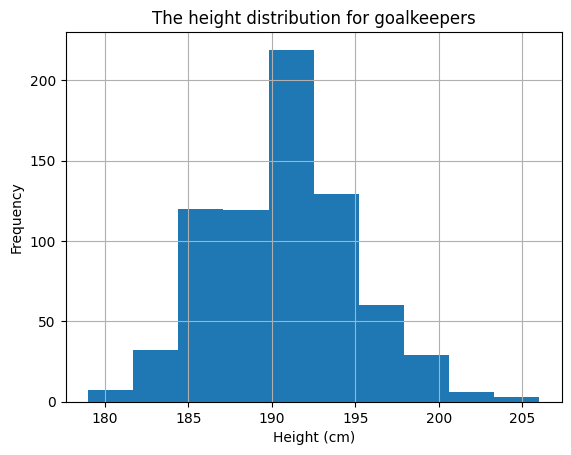

In [ ]:
plt.hist(df[df['positions'] == 'Goalkeeper']['height_cm'])

plt.title('The height distribution for goalkeepers')

plt.xlabel('Height (cm)')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()

17. How does the age distribution differ between defenders and midfielders?

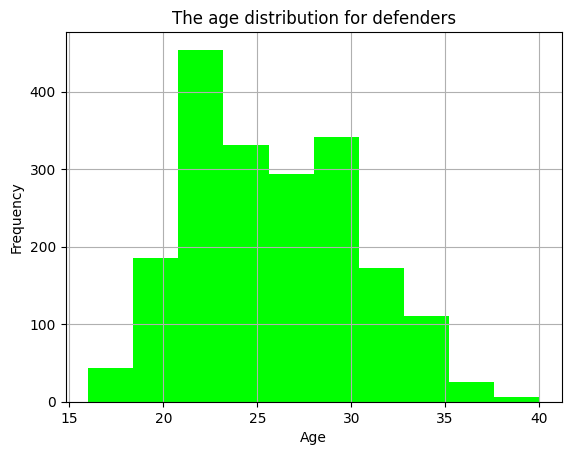

In [ ]:
plt.hist(df[df['positions'] == 'Defender']['Age'], color = 'lime')

plt.title('The age distribution for defenders')

plt.xlabel('Age')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()

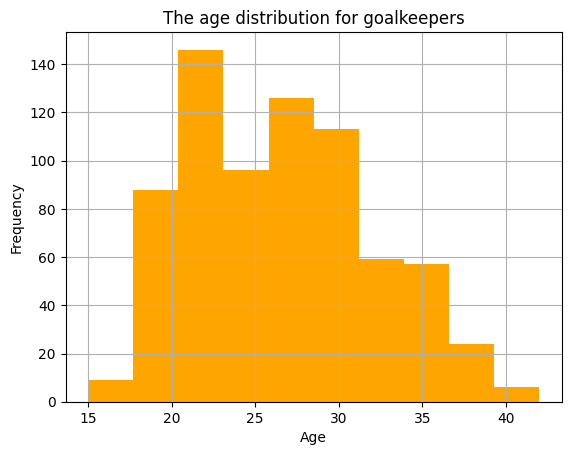

In [ ]:
plt.hist(df[df['positions'] == 'Goalkeeper']['Age'], color = 'orange')

plt.title('The age distribution for goalkeepers')

plt.xlabel('Age')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()

18. What is the nationality distribution across each club?

In [ ]:
df.groupby(['Club', 'nationality']).size().unstack(fill_value = 0)

nationality,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Belarus,...,Türkiye,Uganda,Ukraine,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe
Club,,,,,,,,,,,,,,,,,,,,,
1. FC Union Berlin,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1. Fußball- und Sportverein Mainz 05,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1. Fußballclub Heidenheim 1846,0,0,0,0,0,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
A.G.S Asteras Tripolis,0,1,0,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AFC Ajax Amsterdam,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellow-Red Koninklijke Voetbalclub Mechelen,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ZAO FK Chornomorets Odessa,0,0,0,0,0,0,0,0,0,0,...,0,0,23,0,0,0,0,0,0,0
Çaykur Rizespor Kulübü,0,1,0,0,0,0,0,0,0,0,...,13,0,0,0,0,1,0,0,0,0


19. Which clubs have the most diverse set of nationalities?

In [ ]:
df.groupby('Club')['nationality'].nunique().nlargest(1)

,nationality
Club,
Athlitiki Enosi Konstantinoupoleos,22


20. What percentage of players are goalkeepers?

In [ ]:
all = df.shape[0]

goalkeeper = df[df['positions'] == 'Goalkeeper'].shape[0]

print(f"Percentage of players are goalkeepers: {(goalkeeper / all):.2f}")

Percentage of players are goalkeepers: 0.12


21. How does the age distribution differ between nationalities?

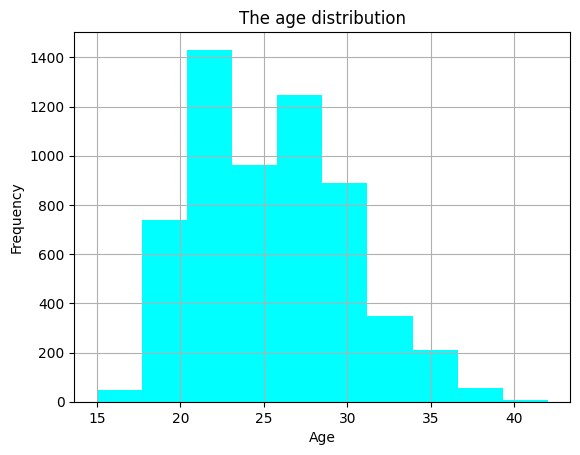

In [ ]:
plt.hist(df['Age'], color = 'cyan')

plt.title('The age distribution')

plt.xlabel('Age')

plt.ylabel('Frequency')

plt.grid(True)

plt.show()

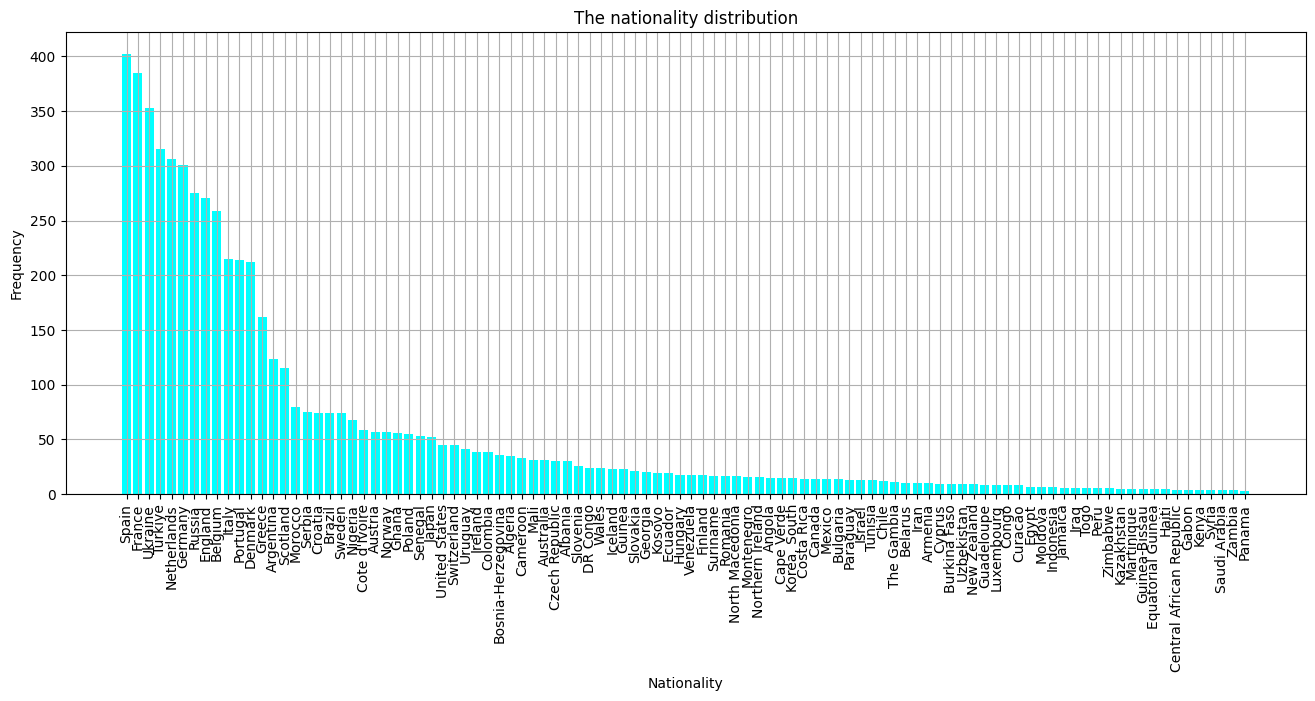

In [ ]:
plt.figure(figsize = (16,6))

plt.bar(df['nationality'].value_counts().head(100).index, df['nationality'].value_counts().head(100).values, color = 'cyan')

plt.title('The nationality distribution')

plt.xlabel('Nationality')

plt.ylabel('Frequency')

plt.xticks(rotation = 90)

plt.grid(True)

plt.show()

22. What is the most common age range in the dataset?

In [ ]:
df.groupby('Age').size().reset_index(name = 'Frequency').sort_values(by = 'Frequency', ascending = False).head(1)['Age'].values[0]

23

23. What is the standard deviation of ages in the dataset?

In [ ]:
print(f"The standard deviation of ages: {df['Age'].std():.2f}")

The standard deviation of ages: 4.46


24. Are older players more likely to play in certain positions?

In [ ]:
df.groupby('positions')['Age'].mean().sort_values(ascending = False).round(2)

,Age
positions,
Goalkeeper,26.59
Defender,25.72
Midfield,25.20
Attack,25.06
Missing,18.00


25. Which nationality has the highest average player age?

In [ ]:
df.groupby('nationality')['Age'].mean().nlargest(1)

,Age
nationality,
Mauritius,32.0


26. Which nationality has the tallest players on average?

In [ ]:
df.groupby('nationality')['height_cm'].mean().nlargest(1)

,height_cm
nationality,
Latvia,198.0


27. Which nationality has the shortest players on average?

In [ ]:
df.groupby('nationality')['height_cm'].mean().nsmallest(1)

,height_cm
nationality,
Lebanon,170.0


28. What are the top five nationalities with the most players in the dataset?

In [ ]:
df.groupby('nationality').size().nlargest(5)

,0
nationality,
Spain,402
France,385
Ukraine,353
Türkiye,315
Netherlands,306


29. Which nationalities are most common in defensive positions?

In [ ]:
df[df['positions'] == 'Defender'].groupby('nationality').size().nlargest(1)

,0
nationality,
Spain,145


30. How many players from each nationality are under 25 years old?

In [ ]:
df[df['Age'] < 25].groupby('nationality').size().sort_values(ascending = False)

,0
nationality,
France,205
Türkiye,174
Ukraine,164
Netherlands,164
Spain,153
...,...
Rwanda,1
Honduras,1
Kenya,1
